In [2]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
# 데이터 확인, nan,0,타입,간격
# 문자 처리 (삭제,아스키,원핫)
# 데이터간 상관관계

In [4]:
df = pd.read_csv('../z20_data/picher_stats_2017.csv')
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


팀명 원핫인코딩

In [5]:
df['팀명'].unique()
hot = []
for i in df['팀명'].to_numpy():
    if i == df['팀명'].unique()[0]:
        i = 0
    elif i == df['팀명'].unique()[1]:
        i = 1
    elif i == df['팀명'].unique()[2]:
        i = 2
    elif i == df['팀명'].unique()[3]:
        i = 3
    elif i == df['팀명'].unique()[4]:
        i = 4
    elif i == df['팀명'].unique()[5]:
        i = 5
    elif i == df['팀명'].unique()[6]:
        i = 6
    elif i == df['팀명'].unique()[7]:
        i = 7
    elif i == df['팀명'].unique()[8]:
        i = 8
    hot.append(i)
df_t = pd.DataFrame(hot)
df['팀명']=df_t
df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,0,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,1,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,2,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,1,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,3,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,7,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,2,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,3,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,6,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [6]:
df.describe()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.980263,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,...,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,2.582340,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,...,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,...,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,...,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,6.000000,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,...,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,8.000000,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,...,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    int64  
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [8]:
df.columns
a_li = list(df.columns)
# df = df[a_li[0:-2]+[a_li[-1]]+[a_li[-2]]]
df_input = df.iloc[:,2:-1]
df_target = df.iloc[:,-1]
input = np.array(df.iloc[:,2:-1])
target = np.array(df.iloc[:,-1])
input.shape
target.shape
# df_input
# df_target
# input

(152,)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(input)
train_scaled = ss.transform(input)
train_scaled

array([[ 3.32457765,  1.23120199, -0.30746498, ..., -1.06162315,
         4.51802888,  3.92582776],
       [ 2.02618144,  2.51300132, -0.09882803, ..., -1.07681252,
         4.10827019,  3.27729381],
       [ 4.36329461,  0.91075216, -0.30746498, ..., -0.86922457,
         3.77439273,  6.84423056],
       ...,
       [-0.8302902 , -0.37104718, -0.30746498, ...,  1.39399038,
        -0.9681847 , -0.28964294],
       [-0.8302902 , -0.05059734, -0.30746498, ...,  0.71553221,
        -1.03647782, -0.48420313],
       [ 0.20842676,  0.26985249, -0.30746498, ...,  1.15096059,
        -1.27170966, -0.48420313]])

선형 회귀 이용 - 스케일링 적용

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_scaled,target,random_state=13)
len(train_input)

114

In [11]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
print(lr.predict(test_input))


0.8808068191975179
0.8963269203551554
[20591.30559833  7653.16187286 11301.60328734  4332.99955157
 -8301.18999067 18656.92879241 10258.68633702 12423.88096248
  6800.70827302  9730.36299198  8133.06583987 25145.7849617
  8452.58113957 51297.94054481  7453.96549537 10353.54574619
 44164.22327826  2369.07677486  4855.72889477  1015.46239453
  4813.38362324 28962.17145498 58220.14638328  9803.0326725
  6019.26900914 14049.48362198  7309.0295982  40114.60205798
 11045.28088781  7780.43805076   -95.53078715 10467.92693132
  5636.96316158 19252.45356506 11899.29283529  3725.22176668
 42785.06726444  7275.7055427 ]


<Axes: >

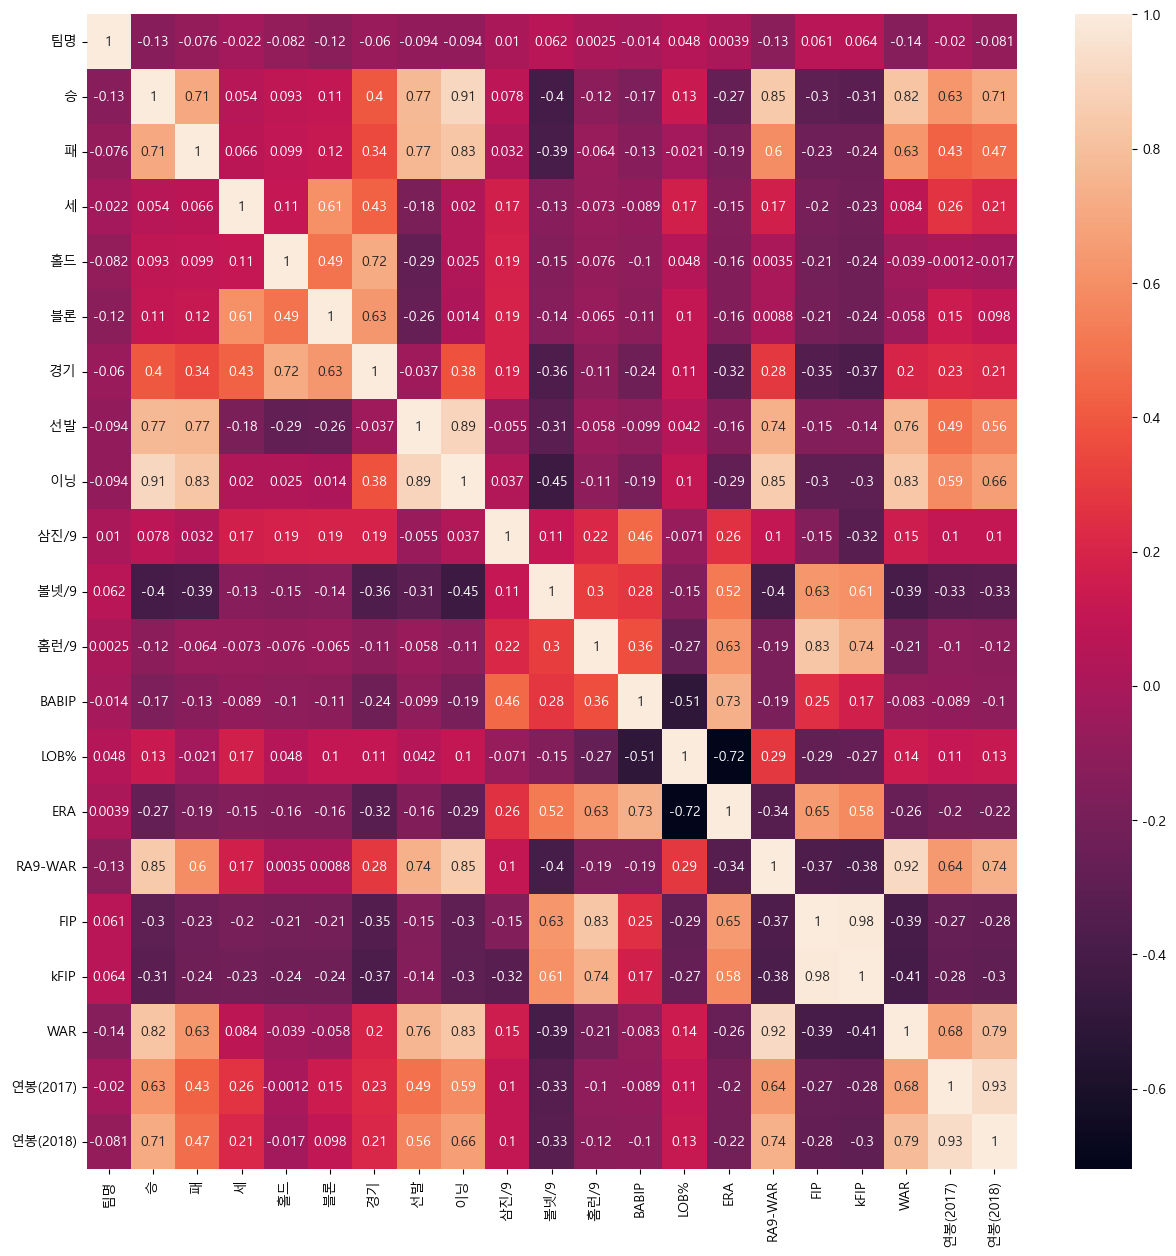

In [12]:
import seaborn as sns
plt.figure(figsize=(15,15))
df2 = df[a_li[0:-2]+[a_li[-1]]+[a_li[-2]]]
# df2
sns.heatmap(df2.iloc[:,1:].corr(),annot=True)


In [13]:
a_li2 = list(df2.columns)
a_li2
df3 = df2[a_li2[1:5]+a_li2[6:11]+[a_li2[14]]+[a_li2[16]]+a_li2[19:21]]
df3

input_n = df3.iloc[:,:]
target_n = df2.iloc[:,-1]
train_input_n, test_input_n, train_target_n, test_target_n = train_test_split(input_n,target_n)

lr_n = LinearRegression()
lr_n.fit(train_input_n,train_target_n)
print(lr_n.score(train_input_n,train_target_n))
print(lr_n.score(test_input_n,test_target_n))
# input_n
# df3
# target_n

0.918917053380019
0.9181216538729471


In [14]:
input2 = input[0:1]
input

array([[ 1.60e+01,  7.00e+00,  0.00e+00, ...,  3.44e+00,  6.62e+00,
         1.40e+05],
       [ 1.10e+01,  1.10e+01,  1.00e+00, ...,  3.41e+00,  6.08e+00,
         1.20e+05],
       [ 2.00e+01,  6.00e+00,  0.00e+00, ...,  3.82e+00,  5.64e+00,
         2.30e+05],
       ...,
       [ 0.00e+00,  2.00e+00,  0.00e+00, ...,  8.29e+00, -6.10e-01,
         1.00e+04],
       [ 0.00e+00,  3.00e+00,  0.00e+00, ...,  6.95e+00, -7.00e-01,
         4.00e+03],
       [ 4.00e+00,  4.00e+00,  0.00e+00, ...,  7.81e+00, -1.01e+00,
         4.00e+03]])

차수 늘리기 - 컬럼의 개수가 너무 많아서 비효율적임

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [16]:
lr_poly = LinearRegression()
lr_poly.fit(train_poly,train_target)
print(lr_poly.score(train_poly,train_target))
print(lr_poly.score(test_poly,test_target))

1.0
-0.9447305931515935


규제

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_input,train_target)
print(ridge.score(train_input,train_target))
print(ridge.score(test_input,test_target))

0.8802938564781121
0.8994842441465789


In [18]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list:
    ridge = Ridge(alpha=i)
    ridge.fit(train_input_n,train_target_n)
    train_score.append(ridge.score(train_input_n,train_target_n))
    test_score.append(ridge.score(test_input_n,test_target_n))
print(train_score)
print(test_score)


[0.9189170533575176, 0.9189170511319338, 0.9189168306146771, 0.9188966654053942, 0.9178942249905622, 0.9096735430034905]
[0.9181223718727125, 0.9181288302471264, 0.9181930578623249, 0.9188021381211174, 0.9229254043842918, 0.9314656063359193]


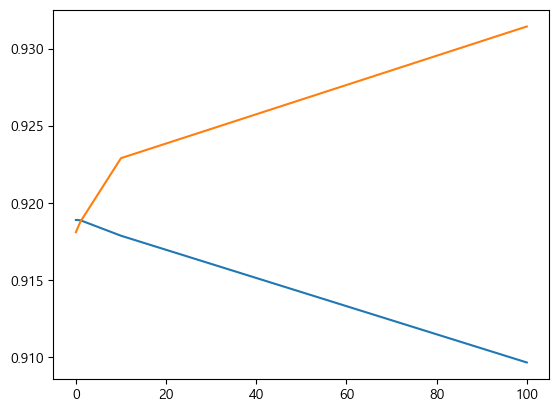

In [19]:
plt.plot(alpha_list,train_score)
plt.plot(alpha_list,test_score)

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.0001)
ridge.fit(train_input,train_target)
print(ridge.score(train_input,train_target))
print(ridge.score(test_input,test_target))

0.8808068191796319
0.8963279526214123


로지스틱 회귀 이용

In [21]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression()
lr2.fit(train_input,train_target)
print(lr2.score(train_input,train_target))
print(lr2.score(test_input,test_target))

0.6929824561403509
0.10526315789473684


로지스틱 반복

In [22]:
lr3 = LogisticRegression(C=10,max_iter=1000)
lr3.fit(train_input,train_target)
print(lr3.score(train_input,train_target))
print(lr3.score(test_input,test_target))

0.9385964912280702
0.07894736842105263


경사하강법

In [23]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='log_loss',max_iter=1000,random_state=42)
sg.fit(train_input,train_target)
print(sg.score(train_input,train_target))
print(sg.score(test_input,test_target))

0.5614035087719298
0.13157894736842105


In [24]:
classes=np.unique(train_target)
classes
tr = []
te = []
for i in range(300):
    sg.partial_fit(train_input,train_target,classes=classes)
    tr.append(sg.score(train_input,train_target))
    te.append(sg.score(test_input,test_target))

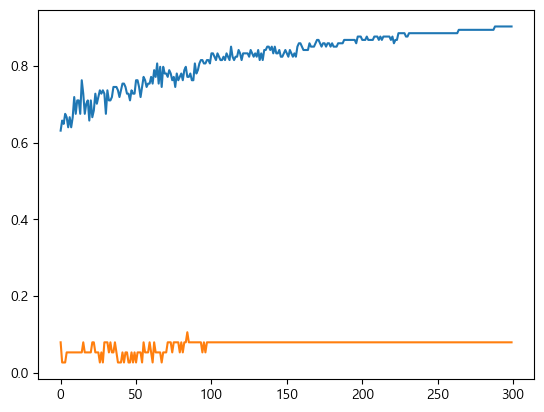

In [25]:
plt.plot(tr)
plt.plot(te)

In [26]:
classes

array([  2700,   2800,   2900,   3000,   3100,   3200,   3300,   3700,
         3800,   4000,   4400,   4500,   4700,   4900,   5000,   5200,
         5300,   5400,   5700,   6000,   6200,   6500,   7500,   8000,
         8300,   9000,   9500,  10000,  10500,  11000,  12000,  12500,
        14000,  16000,  18000,  20000,  21000,  22000,  22500,  25000,
        35000,  40000,  45000,  50000,  70000,  75000,  80000,  85000,
       100000, 120000, 150000], dtype=int64)